In [1]:
import matplotlib.pyplot as plt
import numpy as np


def N_during_irradiation(
    N0, t, decay_constant, neutron_flux, cross_section, nb_Nb93, t_0
):
    A = nb_Nb93 * neutron_flux * cross_section / decay_constant
    return A + (N0 - A) * np.exp(-decay_constant * (t - t_0))


def N_during_rest(N0, t, decay_constant, t_0):
    return N0 * np.exp(-decay_constant * (t - t_0))


irradiation = np.linspace(0, 100, 1000)
rest = np.linspace(100, 2000, 1000)

N0 = 0  # Initial number of atoms
decay_constant = 1 / 1000  # Decay constant (1/s)
neutron_flux = 1e12  # Neutron flux (n/s/cm^2)
cross_section = 1e-24  # Neutron capture cross-section (cm^2)
nb_Nb93 = 1  # Number of Nb-93 atoms (dimensionless)
t_0 = 0  # Initial time (s)

# Calculate N during irradiation and rest
N_irradiation = N_during_irradiation(
    N0,
    irradiation,
    decay_constant,
    neutron_flux,
    cross_section,
    nb_Nb93,
    t_0,
)
N_rest = N_during_rest(N_irradiation[-1], rest, decay_constant, irradiation[-1])

In [2]:
import morethemes as mt

mt.set_theme("minimal")

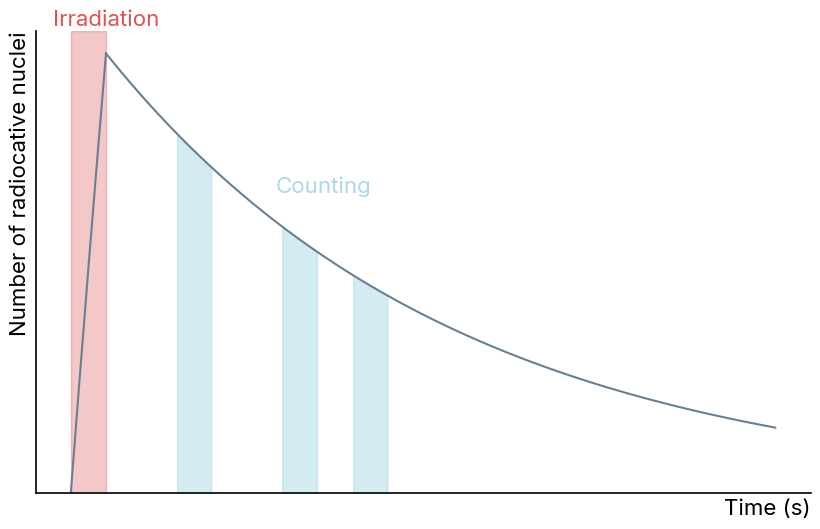

In [18]:
plt.figure(figsize=(10, 6))

# plot linees
l, = plt.plot(irradiation, N_irradiation)
plt.plot(rest, N_rest, color=l.get_color())

# colour irradiation period
plt.axvspan(
    0,
    100,
    color="tab:red",
    alpha=0.25,
)
plt.annotate(
    "Irradiation",
    xy=(100, N_irradiation.max()),
    xytext=(0, 20),
    textcoords="offset points",
    color="tab:red",
    alpha=0.8,
    fontsize=16,
    ha="center",
)

# color counting period during rest only between 200 and 250 s
for counting_time in [300, 600, 800]:
    plt.fill_between(
        rest,
        N_rest,
        where=(rest >= counting_time) & (rest <= counting_time + 100),
        color="lightblue",
        alpha=0.5,
        label="Counting period",
    )

plt.annotate(
    "Counting",
    xy=(600, N_rest.max()),
    xytext=(30, -100),
    textcoords="offset points",
    color="lightblue",
    fontsize=16,
    ha="center",
)

# remove x and y ticks
plt.xticks([])
plt.yticks([])

plt.ylim(bottom=0)

# show left and bottom spines only
plt.gca().spines["left"].set_visible(True)
plt.gca().spines["bottom"].set_visible(True)

plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Number of radiocative nuclei", fontsize=16)

plt.savefig("activation_foil_analysis_sketch.pdf", bbox_inches="tight")
plt.show()